![Image](https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-cover.jpg)



# Iris Classification

The dataset used is gotten from [UCI Machine Learning Respository](https://archive.ics.uci.edu/dataset/53/iris). The goal of the project is to predict the class of an iris flower based on its sepal length, sepal width, petal length and petal width.



## **DAY ONE**: **Exploring a Dataset**

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import joblib
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc

## Data Importation

In this section, we will be importing our dataset and performing data cleaning to fix missing values, outliers and conduct further analysis.

In [2]:
#using pandas as pd
data = pd.read_csv("/workspaces/ECX-4.0-21-Days-Data-Science-Challenge/bezdekIris.data")

In [3]:
#getting the first 5 content of our data
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
#getting the shape
data.shape

(149, 5)

In [5]:
#getting the information summary on our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
#checking to see if we have missing values in our dataset
data.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

Fortunately we have no missing values if we did we will have to use the SimpleImputer from the scikit-learn library to fill up our missing values. 
`from sklearn.impute import SimpleImputer`

## **DAY TWO**: **Exploring a Dataset**

Below are the names of each column: 5.1 : Sepal Length 3.5: Sepal Width 1.4: Petal Length 0.2: Petal Width, Iris-setosa: Species

In the next cell of code will be changing the names


In [7]:
#map for new column names
new_col_names = {
    "5.1": "Sepal_length",
    "3.5": "Sepal_width",
    "1.4": "Petal_length",
    "0.2": "Petal_width",
    "Iris-setosa": "Species"
}

In [8]:
# Rename columns using the rename() function
data.rename(columns=new_col_names, inplace=True)

In [9]:
#checking to confirm changes
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
#getting the statistics summary on our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal_length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
Sepal_width,149.0,3.054362,0.435810,2.0,2.8,3.0,3.3,4.4
Petal_length,149.0,3.773826,1.760543,1.0,1.6,4.4,5.1,6.9
Petal_width,149.0,1.206040,0.760354,0.1,0.3,1.3,1.8,2.5


Since we are dealing with numerical features that are different in terms of scale, I will be using the standard scaler from sklearn to standardize our features so that they have a common mean of 0 and standard deviation of one 

In [11]:
data.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
Species          object
dtype: object

In [12]:
#checking the distribution of our features
for col in data.columns:
    print(data[col].value_counts())

Sepal_length
5.0    10
6.3     9
6.7     8
5.1     8
5.7     8
5.8     7
5.5     7
6.4     7
5.6     6
5.4     6
6.1     6
6.0     6
4.9     6
6.5     5
4.8     5
6.2     4
7.7     4
6.9     4
5.2     4
4.6     4
4.4     3
5.9     3
7.2     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
4.5     1
7.1     1
7.6     1
7.3     1
5.3     1
7.4     1
7.9     1
Name: count, dtype: int64
Sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.3     6
3.8     6
3.5     5
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
Petal_length
1.5    13
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2


In [13]:
#initializing our standard scaler
scaler = StandardScaler()

In [14]:
#getting our numeric features only
numeric_features = [column for column in data.columns if data[column].dtypes in ["float64","int64"]]

In [15]:
numeric_features

['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

In [16]:
#fitting and transforming our numeric features
num_scaled = scaler.fit_transform(data[numeric_features])

In [17]:
#accessing our scaled features into a DataFrame
scaled_df = pd.DataFrame(num_scaled, columns=numeric_features)

In [18]:
scaled_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,-1.148356,-0.125160,-1.352896,-1.327583
1,-1.390542,0.335304,-1.409888,-1.327583
2,-1.511636,0.105072,-1.295904,-1.327583
3,-1.027262,1.256231,-1.352896,-1.327583
4,-0.542889,1.946927,-1.181919,-1.063660


In [19]:
# #initializing our encoder for our categorical variable
# encoder = OneHotEncoder()

In [20]:
# #encoding our categorical feature
# encoded_iris = encoder.fit_transform(data[["Iris-setosa"]])

# # Convert the encoded data to a DataFrame 
# encoded_data_array = encoded_iris.toarray()
# encoded_df = pd.DataFrame(encoded_data_array, columns=encoder.get_feature_names_out(["Iris-setosa"]))


## **DAY THREE**: **Exploratory Data Analysis**

I will be performing univariate, bivariate and correlation analysis on my dataset.

In [21]:
#combining the scaled features with my original dataframe and dropping the previous ones
new_data = pd.concat([scaled_df,data.select_dtypes(exclude=['float64', 'int64'])], axis = 1)

In [22]:
new_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,-1.148356,-0.125160,-1.352896,-1.327583,Iris-setosa
1,-1.390542,0.335304,-1.409888,-1.327583,Iris-setosa
2,-1.511636,0.105072,-1.295904,-1.327583,Iris-setosa
3,-1.027262,1.256231,-1.352896,-1.327583,Iris-setosa
4,-0.542889,1.946927,-1.181919,-1.063660,Iris-setosa


**Univariate Analysis**

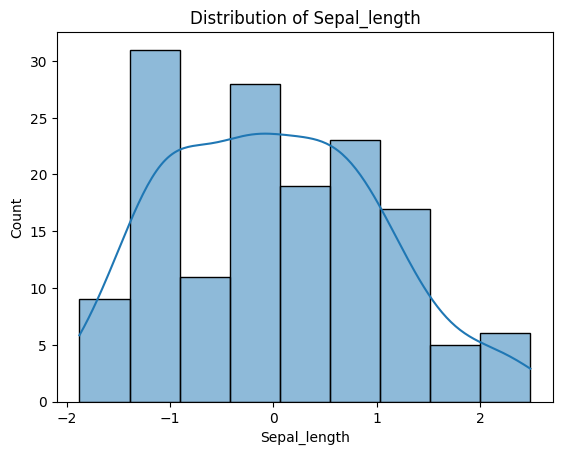

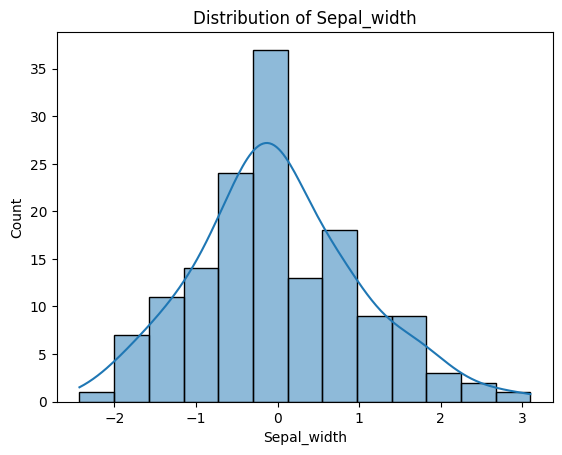

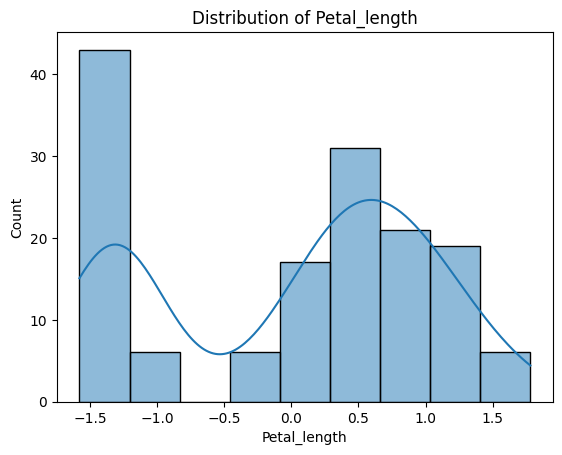

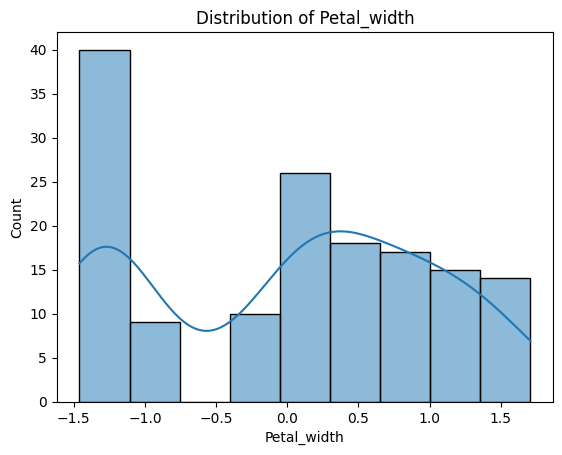

In [23]:
#visualizing the numeric features in our dataset
for col in numeric_features:
    sns.histplot(data = new_data[numeric_features], x = col, kde = True)
    plt.title(f"Distribution of {col}")
    plt.show();

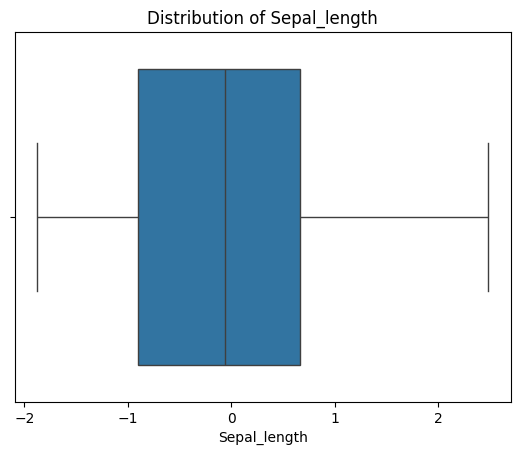

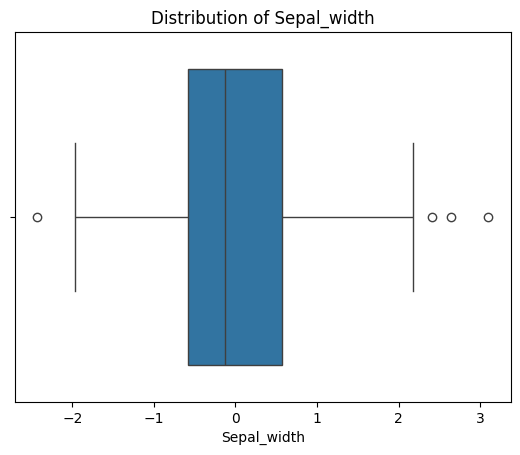

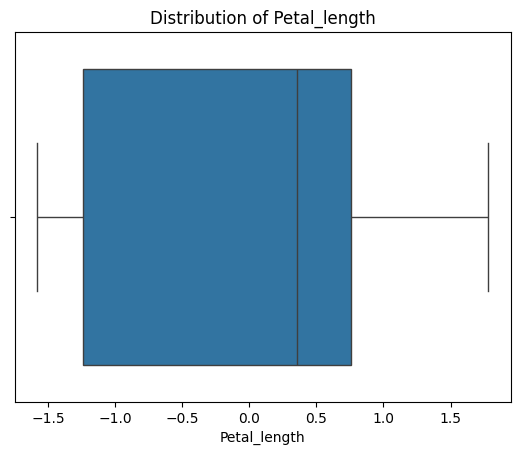

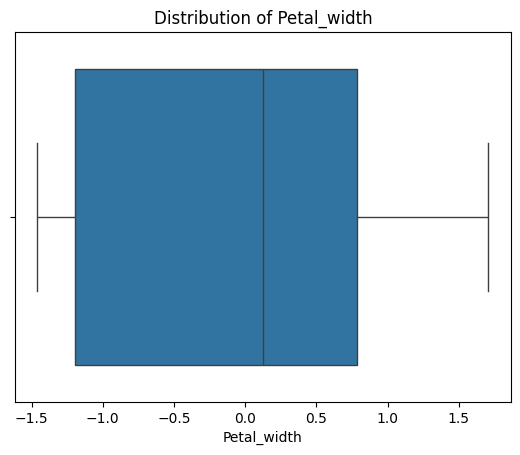

In [24]:
#using a boxplot to check for outliers
for col in numeric_features:
    sns.boxplot(data = new_data[numeric_features], x = col)
    plt.title(f"Distribution of {col}")
    plt.show();

Column `sepal_width` has some outliers.

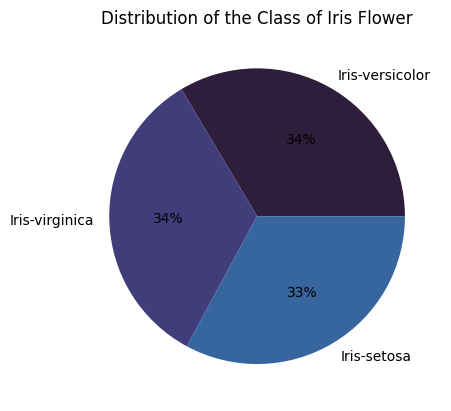

In [25]:
#distribution for the iris-setosa column using our original data set before we encoded
iris = dict(data["Species"].value_counts())
palette = sns.color_palette("mako")
plt.pie(iris.values(), labels = iris.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of the Class of Iris Flower")
plt.show();

**Multivariate Analysis**

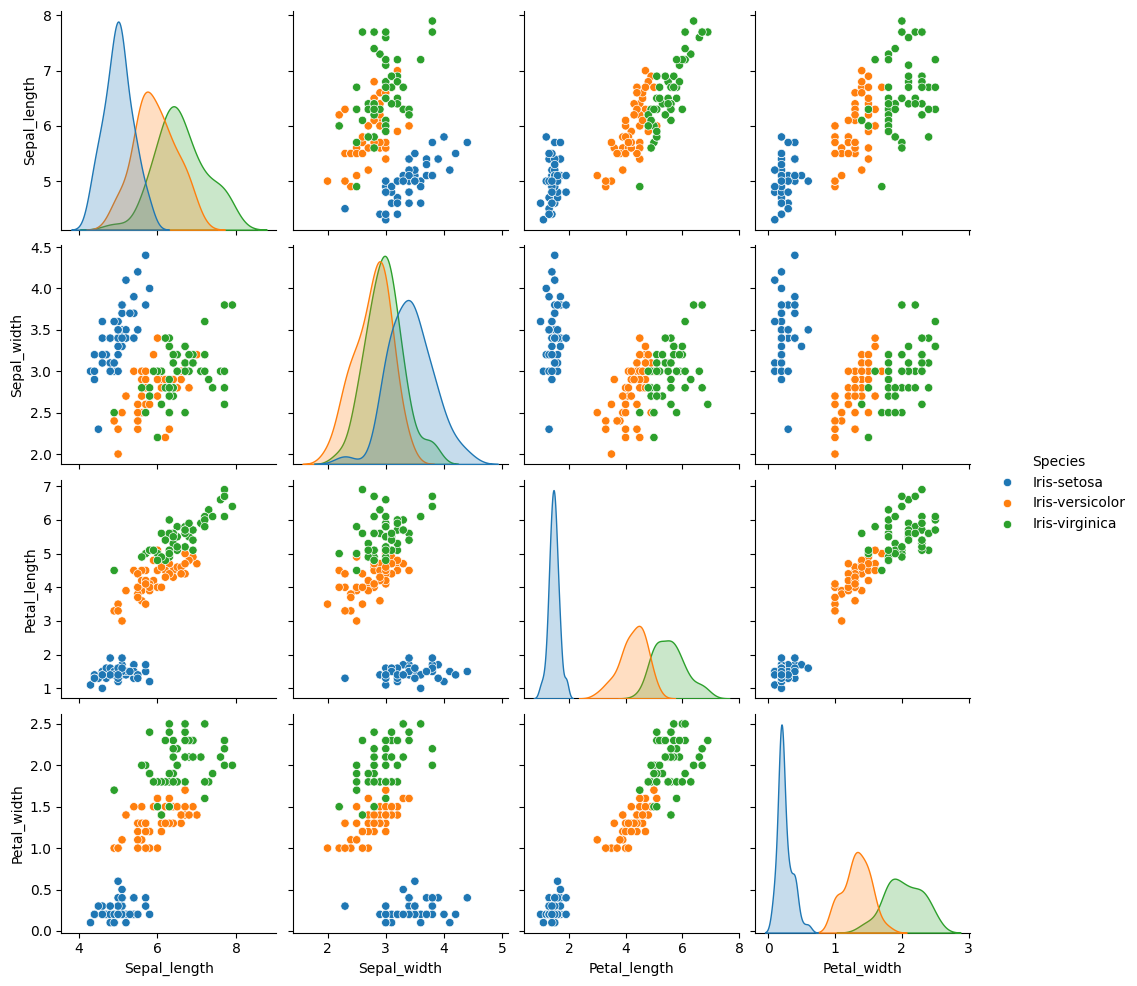

In [26]:
sns.pairplot(data, hue = "Species");

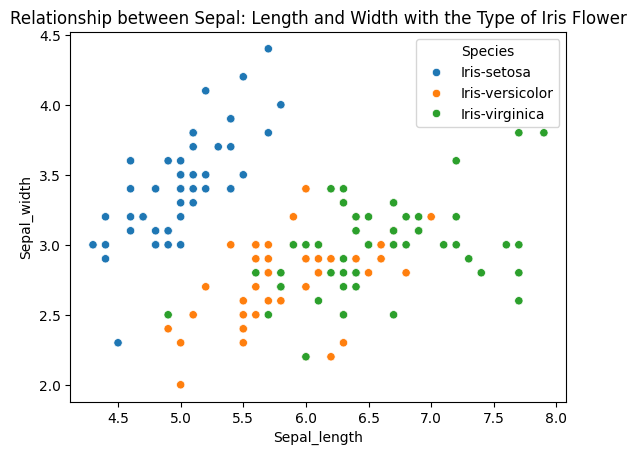

In [27]:
#relationship between the type of iris flower and the sepal length and width
sns.scatterplot(data, x = "Sepal_length", y = "Sepal_width", hue = "Species")
plt.title("Relationship between Sepal: Length and Width with the Type of Iris Flower");

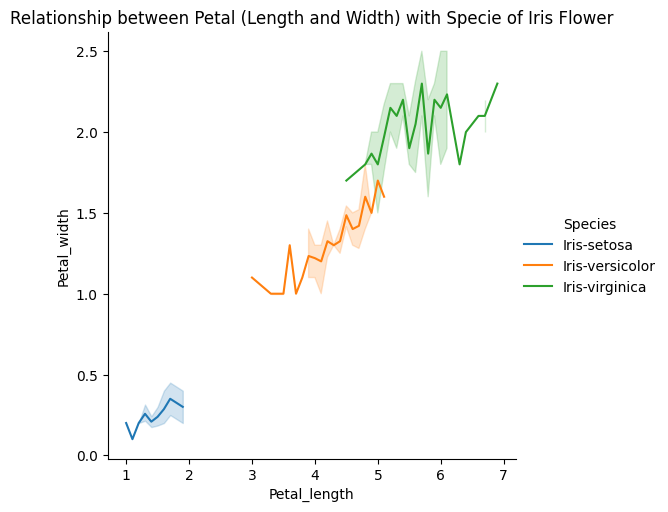

In [28]:
#realtionship between petal length and width with the specie of flower
sns.relplot(data = data, kind = "line",  x = "Petal_length", y = "Petal_width", hue = "Species")
plt.title("Relationship between Petal (Length and Width) with Specie of Iris Flower");

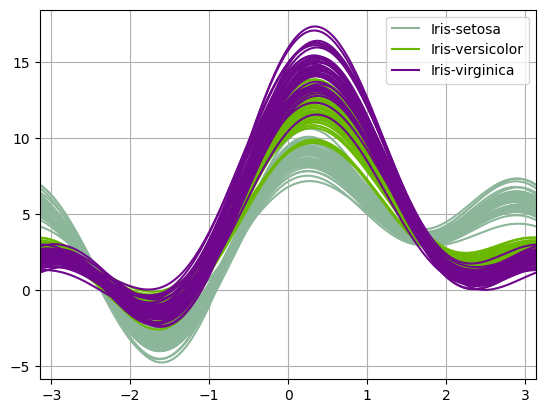

In [29]:
#using an andrews curve for our dataset
andrews_curves(data, "Species");

**Correlation Analysis**

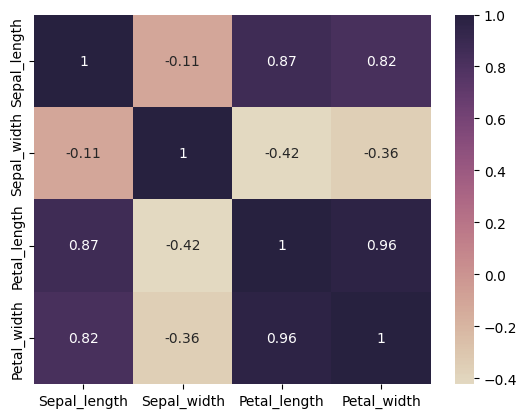

In [30]:
sns.heatmap(data[numeric_features].corr(), annot = True, cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True));

**Inference: Some of the features are high correlated like our `Petal_length, Petal_width, Sepal_length`**

## **DAY FOUR: Feature Engineering**

In this section I will be modifying our existing features to improve the model's performance. Since the numerical features have been scaled, I will be encoding our target features. 

In [31]:
new_data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [32]:
#encoding our categorical target variabe
encoding = LabelEncoder()
new_data["Species"] = encoding.fit_transform(new_data["Species"])

In [33]:
new_data.Species.value_counts() #checking to see the effect of the label encoder. 

Species
1    50
2    50
0    49
Name: count, dtype: int64

Since we are dealing with a dataset with few features, feature engineering will not be in full effect but I have been able to perform a part of it which is feature scaling. Moving on, from our correlation Analysis, it was dicovered that our dataset have some features that are highly correlated (Multicollinearity). So I will be doing two things:

* Building our ML model with all our features.
  
* Building our ML model after removing one out of two highly correlated features. 

In [34]:
#data splitting
X = new_data.drop("Species", axis = 1) #features
y = new_data.Species #targer variable

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## **DAY FIVE: Model Selection**

There are different ML models to address different problems. In my case, the problem I am dealing with is a classification problem and that is because our target variable -Species- has a predefined number of categories. So to deal with this problem I will be using four ML models to solve the problem and then I will pick the best one.
* RandomForestClassifier
* LogisticRegression
* DecisionTreeClassifier
* Support Vector 

In [35]:
#initializing our models
rfc = RandomForestClassifier()
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()

In [36]:
#a function to calculate the performance of the models
def performance_metrics(y_test, predictions):
    print("Model Accuracy: ", accuracy_score(y_test, predictions))
    print(f"CLASSIFICATION REPORT : \n{classification_report(y_test, predictions)}")
    

### **Random Forest Classifier: Building with all our Features**

In [37]:
#model fitting
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
#making predictions
rfc_predictions = rfc.predict(X_test)

In [39]:
performance_metrics(y_test, rfc_predictions) #model evaluation

Model Accuracy:  0.9
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### **Logistic Regression**

In [40]:
#model training
lg.fit(X_train,y_train)

LogisticRegression()

In [41]:
#model prediction
lg_predictions = lg.predict(X_test)

In [42]:
#model evaluation
performance_metrics(y_test, lg_predictions)

Model Accuracy:  0.9333333333333333
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### **Decision Tree Classifier**

In [43]:
#model training
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
#model prediction
dtc_predictions = lg.predict(X_test)

In [45]:
#model evaluation
performance_metrics(y_test, dtc_predictions)

Model Accuracy:  0.9333333333333333
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### **Support Vector Classifier**

In [46]:
#model fitting
svc.fit(X_train,y_train)

SVC()

In [47]:
#model predictions
svc_predictions = svc.predict(X_test)

In [48]:
#model evaluation
performance_metrics(y_test, svc_predictions)

Model Accuracy:  0.9666666666666667
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Looking at the performance of our models, we can see that they are all doing very well. Each of our models have good F1 score for each class meaning that our model is taking into consideration the different classes we have when making predictions. Our Support Vector Classifier has proven to be the best with an **accuracy score of 0.967**. This suggests that the SVC achieves the highest overall correct predictions amongst all our models.
The further analysis of our precision, recall, and support metrics reveals consistent and balanced performance across various evaluation criteria. 

### **Support Vector Classifier: Building with only two Features that are not highly correlated**

In [49]:
#data splitting
X_feat = new_data.drop(["Species", "Petal_width", "Sepal_length"], axis = 1)
y_feat = new_data.Species

X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X_feat, y_feat, test_size = 0.2, stratify = y, random_state = 42)

In [50]:
#model fitting
svc.fit(X_train_f, y_train_f)

SVC()

In [51]:
#predictions
svc_pred = svc.predict(X_test_f)

In [52]:
#model evaluation
performance_metrics(y_test_f, svc_pred)

Model Accuracy:  0.8666666666666667
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.90      0.82        10
           2       0.89      0.80      0.84        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



Building our model with two features that aren't highly correlated we can observe that the accuracy of our model dropped, the f1 scores are still quite good. The precision aspect is also okay but for our class 1 the precision isn't quite very good meaning that model has a slight difficulty in making the right prediction for it.

## **DAY SIX: Hyperparameter Tuning of our Models**

In this section, I will be tweaking the parameters of our models using the grid search and see if it will further improve the performance of our models. [Lear more on different model parameters](

### **Random Forest Classifier**

In [53]:
#parameter tweaking
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [54]:
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [55]:
# Perform hyperparameter search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [56]:
# Get the best parameters
best_params = random_search.best_params_

In [57]:
# Train the final model with the best parameters
rfc_final_model = RandomForestClassifier(**best_params)
rfc_final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300)

In [58]:
#predictions
rfc_final_preds = rfc_final_model.predict(X_test)

In [59]:
#evaluation
performance_metrics(y_test, rfc_final_preds)

Model Accuracy:  0.9666666666666667
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



From the above we can see that our model's performance has improved significantrly. **When we didn't perform hyperparameter tuning we had an accuracy of 0.90** but now **with hyperparameter tuning we have an accuracy of 0.967**

### **Logistic Regression**

In [60]:
#parameter tweaking 
param_grid_lg = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 0, 1.0],
    "solver": ["liblinear", "saga"]
}

In [61]:
# Instantiate GridSearchCV
grid_search_lg = GridSearchCV(estimator=lg, param_grid=param_grid_lg,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [62]:
# Perform hyperparameter search
grid_search_lg.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/model

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0, 1.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [63]:
# Get the best parameters
best_params_lg = grid_search_lg.best_params_

In [64]:
# Train the final model with the best parameters
lg_final_model = LogisticRegression(**best_params_lg, max_iter=1000)
lg_final_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [65]:
#prediction
lg_final_pred = lg_final_model.predict(X_test)

In [66]:
#evaluation
performance_metrics(y_test, lg_final_pred)

Model Accuracy:  0.9333333333333333
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Our results from hyperparameter tuning is still the same as when we didn't tune our parameters.

### **Decision Tree Classifier**

In [67]:
#parameter tweaking 
param_grid_dtc = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2,4,6],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_leaf":[1,2,4]
}

In [68]:
# Instantiate GridSearchCV
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [69]:
# Perform hyperparameter search
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy', verbose=1)

In [70]:
# Get the best parameters
best_params_dtc = grid_search_dtc.best_params_

In [71]:
# Train the final model with the best parameters
dtc_final_model = DecisionTreeClassifier(**best_params_dtc)
dtc_final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_features='log2', min_samples_split=6)

In [72]:
#prediction
dtc_final_pred = dtc_final_model.predict(X_test)

In [73]:
#evaluation
performance_metrics(y_test, dtc_final_pred)

Model Accuracy:  0.8666666666666667
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.80      0.80        10
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



Our Decision Tree model didn't show any improvement in accuracy but the precision of our Class One fell in comaprison to what we got when we didn't perform hyperparameter tuning.

### **Support Vector Classsifier**

In [74]:
#parameter tweaking 
param_grid_svc = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.01, 0.1, 1, 10],
    "gamma": [0.1, 1, 10 ]
}

In [75]:
# Instantiate GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [76]:
# Perform hyperparameter search
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [77]:
# Get the best parameters
best_params_svc = grid_search_svc.best_params_

In [78]:
# Train the final model with the best parameters
svc_final_model = SVC(**best_params_svc)
svc_final_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [79]:
#prediction
svc_final_pred = svc_final_model.predict(X_test)

In [80]:
#evaluation
performance_metrics(y_test, svc_final_pred)

Model Accuracy:  1.0
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



So from our hyperparameter tuning we can see that our Support Vector Classifier performed really well with a perfect accuracy, precision, recall and f1 score. 

## **DAY SEVEN: Model Selection and Visualization of Performance Metrics**

Since I have proved the generalization of my model by incorporating the cross validation technique during the hyperparameter process, I will be visualizing the confusion metrics and also the roc curve for each of our models. To know more about multi class confusion matrix [Learn more](https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/)

In [81]:
#function to visualize the confusion matrix for each of our models
def mat_visual(y_test,predicted):
    conf_mat_rfc  = confusion_matrix(y_test, predicted)
    sns.heatmap(conf_mat_rfc, annot = True, cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### Random Forest Classifier

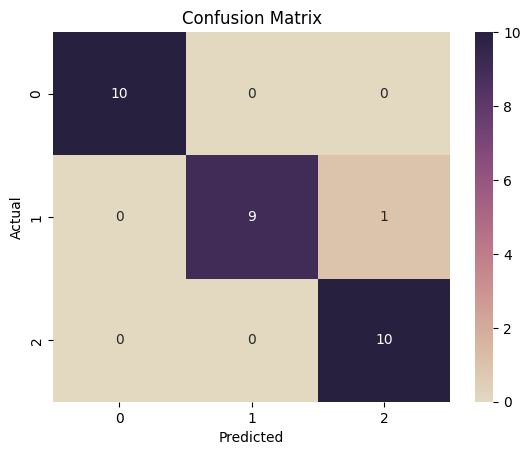

In [82]:
mat_visual(y_test, rfc_final_preds)

### Logistic Regression

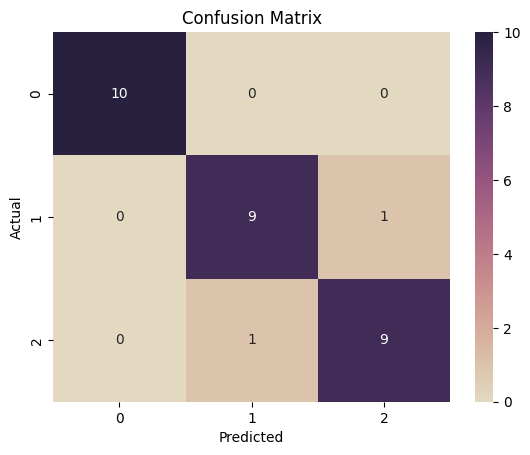

In [83]:
mat_visual(y_test, lg_final_pred)

### Decision Tree Classifier

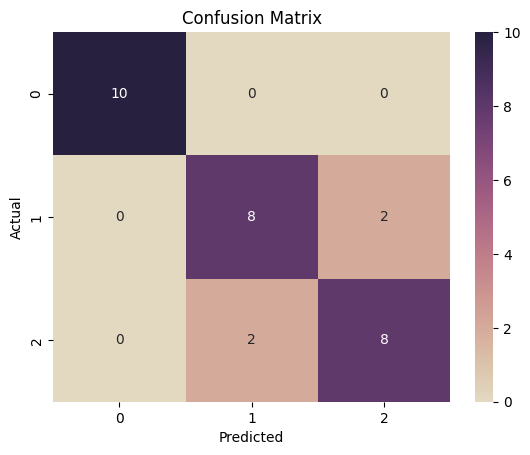

In [84]:
mat_visual(y_test, dtc_final_pred)

### Support Vector Classifier

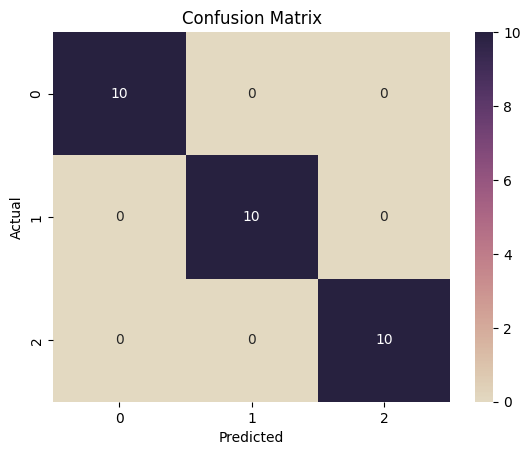

In [85]:
mat_visual(y_test, svc_final_pred)

In [86]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

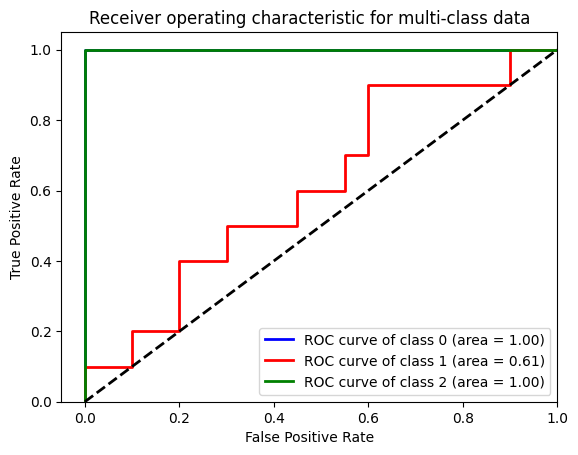

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, C=1, gamma=0.1,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
lw = 2  # Line width for the plots
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

A good AUC score is one that is closer to one. Anything less than 0.7 is considered not good. From the above visualization we can confirm that the AUC score for our class 1 is not really good. 

## **DAY EIGHT: Model Deployment**

In this section, I will be choosing my best model and preparing it for deployment. 

In [88]:
#saving our SVC model for deployemt since it is our best performing model
joblib.dump(svc_final_model, "Iris_Classification_Model.joblib")

['Iris_Classification_Model.joblib']

## **DAY NINE: Model Deployment**